## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

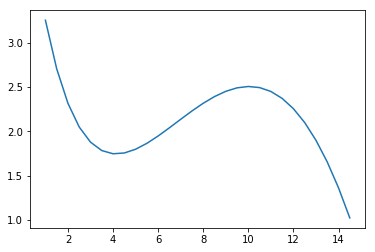

In [2]:
x = np.arange(1, 15, .5)
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

plt.plot(x, y)
plt.show()

In [48]:
x1_1 = 1
x1_2 = 15

y1_1 = np.sin(x1_1 / 5) * np.exp(x1_1 / 10) + 5 * np.exp(-x1_1 / 2)
y1_2 = np.sin(x1_2 / 5) * np.exp(x1_2 / 10) + 5 * np.exp(-x1_2 / 2)

a1 = np.array([[1, x1_1], [1, x1_2]])
b1 = np.array([y1_1, y1_2])
w1 = np.linalg.solve(a1, b1)
print(w1)

[ 3.43914511 -0.18692825]


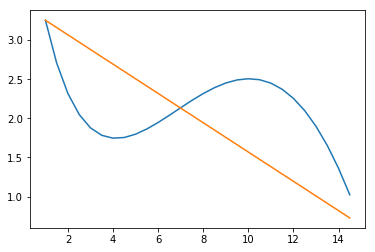

In [50]:
x = np.arange(1, 15, .5)
y_1 = sum(w1[i] * x**i for i in range(2))
plt.plot(x, y, '-', x, y_1, '-')
plt.show()

In [51]:
x2_1 = 1
x2_2 = 8
x2_3 = 15

y2_1 = np.sin(x2_1 / 5) * np.exp(x2_1 / 10) + 5 * np.exp(-x2_1 / 2)
y2_2 = np.sin(x2_2 / 5) * np.exp(x2_2 / 10) + 5 * np.exp(-x2_2 / 2)
y2_3 = np.sin(x2_3 / 5) * np.exp(x2_3 / 10) + 5 * np.exp(-x2_3 / 2)

a2 = np.array([[1, x2_1, x2_1**2], [1, x2_2, x2_2**2], [1, x2_3, x2_3**2]])
b2 = np.array([y2_1, y2_2, y2_3])
w2 = np.linalg.solve(a2, b2)

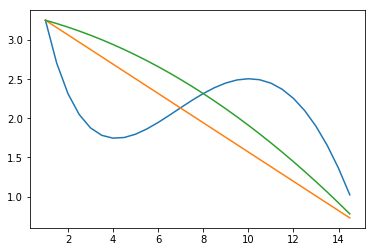

In [52]:
x = np.arange(1, 15, .5)
y_1 = sum(w1[i] * x**i for i in range(2))
y_2 = sum(w2[i] * x**i for i in range(3))
plt.plot(x, y, '-', x, y_1, '-', x, y_2, '-')
plt.show()

In [46]:
x3_1= 1
x3_2 = 4
x3_3 = 10
x3_4 = 15

y3_1 = np.sin(x3_1 / 5) * np.exp(x3_1 / 10) + 5 * np.exp(-x3_1 / 2)
y3_2 = np.sin(x3_2 / 5) * np.exp(x3_2 / 10) + 5 * np.exp(-x3_2 / 2)
y3_3 = np.sin(x3_3 / 5) * np.exp(x3_3 / 10) + 5 * np.exp(-x3_3 / 2)
y3_4 = np.sin(x3_4 / 5) * np.exp(x3_4 / 10) + 5 * np.exp(-x3_4 / 2)

a3 = np.array([[1, x3_1, x3_1**2, x3_1**3], [1, x3_2, x3_2**2, x3_2**3], [1, x3_3, x3_3**2, x3_3**3], [1, x3_4, x3_4**2, x3_4**3]])
b3 = np.array([y3_1, y3_2, y3_3, y3_4])
w3 = np.linalg.solve(a3, b3)
print(w3)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


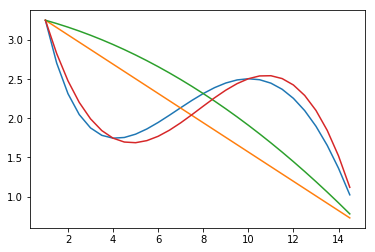

In [53]:
x = np.arange(1, 15, .5)
y_1 = sum(w1[i] * x**i for i in range(2))
y_2 = sum(w2[i] * x**i for i in range(3))
y_3 = sum(w3[i] * x**i for i in range(4))
plt.plot(x, y, '-', x, y_1, '-', x, y_2, '-', x, y_3, '-')
plt.show()

In [62]:
coef = list((str(round(w3[i], 2)) for i in range(4)))
answer = ', '.join(coef)
print(answer)

4.36, -1.3, 0.19, -0.01


In [65]:
with open('submission-2.txt', 'w') as file:
    file.write(answer)